# Soheil Shirvani &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Student Number: 862465192


<h2>Imports</h2>

In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Dataset

In [2]:
# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [4]:
df = breast_cancer_wisconsin_diagnostic.data.original

X = df.drop(["ID", "Diagnosis"], axis=1)
y = df["Diagnosis"]

X_norm = X / np.std(X,axis = 0)
X_norm -= np.mean(X, axis = 0)

display(y)
display(X)
display(X_norm)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: Diagnosis, Length: 569, dtype: object

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,-9.017876,-16.874153,-86.910877,-652.042157,8.329628,5.156590,3.678948,3.745376,8.650470,11.095164,...,-11.013435,-22.855140,-101.762747,-877.033903,6.977813,3.979881,3.143169,3.926533,7.153333,6.504995
1,-8.285120,-15.154450,-86.494856,-651.117824,5.934199,1.386003,1.002228,1.761045,6.434348,7.970765,...,-11.094197,-21.865050,-102.531222,-877.144651,5.294515,0.932772,0.886893,2.717541,4.158821,4.849170
2,-8.535052,-14.344631,-86.614307,-651.467648,7.703372,2.926001,2.389552,3.250131,7.372640,8.441409,...,-11.388255,-21.519821,-102.718872,-877.578855,6.197534,2.446148,1.888616,3.585457,5.554966,4.769371
3,-10.883850,-14.547086,-88.773498,-653.790996,10.044715,5.275984,2.941971,2.664608,9.300338,13.750336,...,-13.181589,-21.361863,-104.316287,-879.585161,9.064401,5.256613,3.023230,3.806243,10.448752,9.502991
4,-8.364644,-15.952634,-86.404237,-651.200303,7.041534,2.412415,2.397085,2.641393,6.423395,8.276967,...,-11.601550,-22.962617,-102.727808,-877.814416,5.890683,1.049821,1.646821,2.359716,3.534358,4.170881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-8.003946,-14.079345,-86.120025,-650.682676,7.803004,2.092135,2.973358,3.533865,6.120366,7.908390,...,-10.998939,-21.378147,-102.313785,-877.019839,6.048492,1.089898,1.698154,3.259608,3.042552,3.858890
565,-8.410086,-12.715684,-86.564879,-651.302690,6.863620,1.855242,1.719117,2.476570,6.215291,7.780806,...,-11.363405,-19.448448,-102.644408,-877.540181,4.978896,0.968395,1.270215,2.364284,3.870856,3.594002
566,-9.412656,-12.755244,-87.508135,-652.448579,5.920678,1.834395,1.072661,1.318678,5.623838,7.943830,...,-12.338763,-20.120993,-103.487347,-878.607234,4.860539,1.713951,1.360409,2.044525,3.298162,4.249571
567,-8.276599,-12.464361,-86.198286,-651.291314,8.286929,5.145219,4.323018,3.871766,8.570149,9.883112,...,-10.938885,-19.257921,-101.762747,-877.381969,7.100553,5.268064,4.231247,3.920442,6.321794,6.787616


# k-means clustering

In [17]:
class KMeans:
    def __init__(self, k, initialization='kmeans++', max_iter=300, tol=1e-4):
        self.k = k
        self.initialization = initialization
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def initialize_centroids(self, data):
        if self.initialization == 'random':
            indices = np.random.choice(len(data), self.k, replace=False)
            self.centroids = data.iloc[indices].to_numpy()
        elif self.initialization == 'kmeans++':
            self.centroids = [data.iloc[np.random.randint(len(data))].to_numpy()]
            for _ in range(1, self.k):
                distances = np.array([min(np.linalg.norm(x - centroid) ** 2 for centroid in self.centroids) for x in data.to_numpy()])
                probabilities = distances / distances.sum()
                cumulative_probabilities = np.cumsum(probabilities)
                r = np.random.rand()
                for i, p in enumerate(cumulative_probabilities):
                    if r < p:
                        self.centroids.append(data.iloc[i].to_numpy())
                        break
            self.centroids = np.array(self.centroids)

    def assign_clusters(self, data):
        data = np.asarray(data)  # Ensure data is numpy array
        distances = np.array([[np.linalg.norm(x - centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

    def update_centroids(self, data, labels):
        new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(self.k)])
        return new_centroids

    def fit(self, data):
        self.initialize_centroids(data)
        for i in range(self.max_iter):
            labels = self.assign_clusters(data)
            new_centroids = self.update_centroids(data, labels)
            if np.all(np.linalg.norm(new_centroids - self.centroids, axis=1) < self.tol):
                break
            self.centroids = new_centroids
        return self.centroids, labels

    def fit_predict(self, data):
        self.fit(data)
        return self.assign_clusters(data)

In [17]:
# Range of k values
k_values = range(1, 6)

# Record the performance
means_random = []
stds_random = []
means_kmeanspp = []
stds_kmeanspp = []

# Calculate the average silhouette scores for different k and initialization methods
for k in k_values:
    scores_random = []
    scores_kmeanspp = []
    for _ in range(10):  # 10 different random initializations
        # Random initialization
        kmeans_random = KMeans(k=k, initialization='random')
        labels_random = kmeans_random.fit_predict(X)
        if np.unique(labels_random).size > 1:
            scores_random.append(silhouette_score(X, labels_random))
        
        # K-means++ initialization
        kmeans_kmeanspp = KMeans(k=k, initialization='kmeans++')
        labels_kmeanspp = kmeans_kmeanspp.fit_predict(X)
        if np.unique(labels_kmeanspp).size > 1:
            scores_kmeanspp.append(silhouette_score(X, labels_kmeanspp))
    
    means_random.append(np.mean(scores_random))
    stds_random.append(np.std(scores_random))
    means_kmeanspp.append(np.mean(scores_kmeanspp))
    stds_kmeanspp.append(np.std(scores_kmeanspp))


performance_random, performance_kmeanspp

E:\UCR_Projects\DataMining\pythonEnv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
E:\UCR_Projects\DataMining\pythonEnv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
E:\UCR_Projects\DataMining\pythonEnv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
E:\UCR_Projects\DataMining\pythonEnv\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
E:\UCR_Projects\DataMining\pythonEnv\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


([nan,
  0.6972646156059465,
  0.6026489128751111,
  0.5334614737117133,
  0.5077569910588088],
 [nan,
  0.6972646156059465,
  0.6036700040555015,
  0.5486760898193095,
  0.5145726947620415])

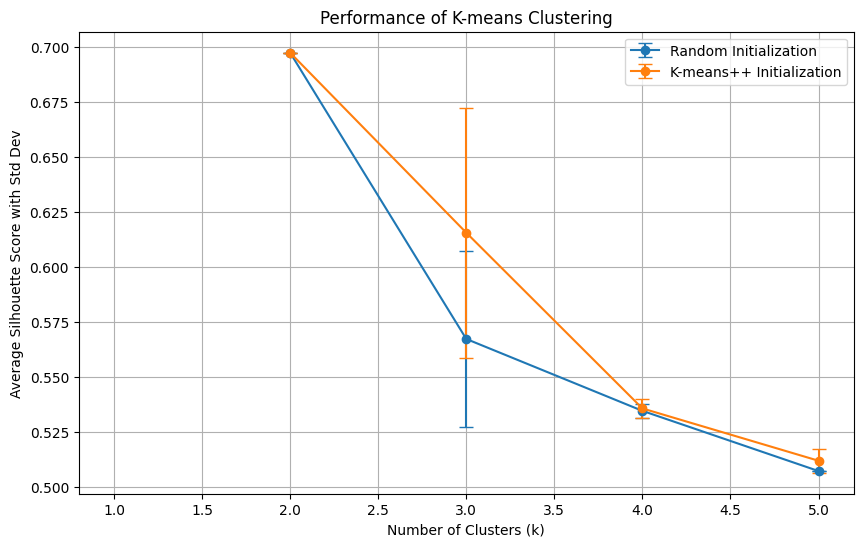

In [18]:
# Plotting the results with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, means_random, yerr=stds_random, label='Random Initialization', fmt='-o', capsize=5)
plt.errorbar(k_values, means_kmeanspp, yerr=stds_kmeanspp, label='K-means++ Initialization', fmt='-o', capsize=5)
plt.title('Performance of K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score with Std Dev')
plt.legend()
plt.grid(True)
plt.show()

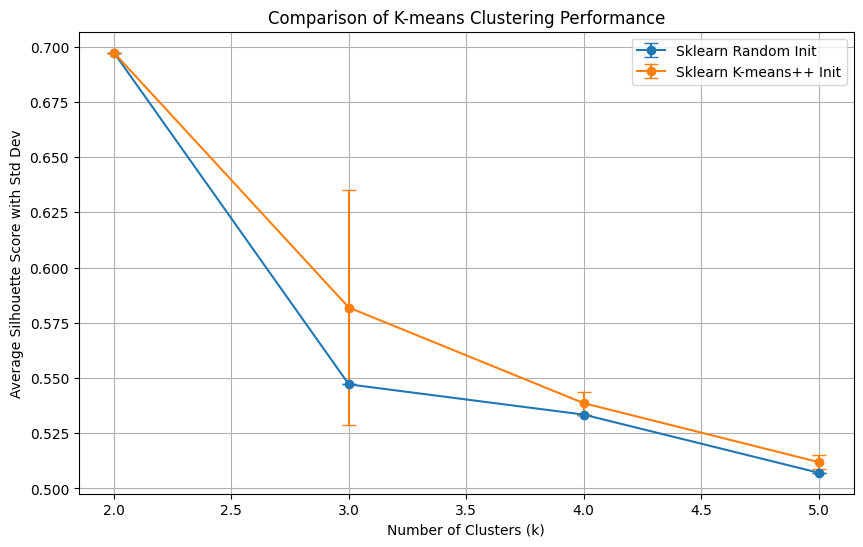

In [23]:
from sklearn.cluster import KMeans as SKLearnKMeans

# Range of k values
k_values = range(2, 6)  # Starting from k=2 because silhouette score is undefined for k=1

# Calculate the average and standard deviation of silhouette scores for different k using sklearn's KMeans
means_sklearn_random = []
stds_sklearn_random = []
means_sklearn_kmeanspp = []
stds_sklearn_kmeanspp = []

for k in k_values:
    scores_sklearn_random = []
    scores_sklearn_kmeanspp = []
    for _ in range(10):  # Perform 10 different random initializations
        # Random initialization
        sklearn_kmeans_random = SKLearnKMeans(n_clusters=k, init='random', n_init=1, max_iter=300, random_state=None)
        labels_sklearn_random = sklearn_kmeans_random.fit_predict(X)
        scores_sklearn_random.append(silhouette_score(X, labels_sklearn_random))
        
        # K-means++ initialization
        sklearn_kmeans_kmeanspp = SKLearnKMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=300, random_state=None)
        labels_sklearn_kmeanspp = sklearn_kmeans_kmeanspp.fit_predict(X)
        scores_sklearn_kmeanspp.append(silhouette_score(X, labels_sklearn_kmeanspp))
    
    means_sklearn_random.append(np.mean(scores_sklearn_random))
    stds_sklearn_random.append(np.std(scores_sklearn_random))
    means_sklearn_kmeanspp.append(np.mean(scores_sklearn_kmeanspp))
    stds_sklearn_kmeanspp.append(np.std(scores_sklearn_kmeanspp))

# Plotting the results with error bars for both custom and sklearn implementations
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, means_sklearn_random, yerr=stds_sklearn_random, label='Sklearn Random Init', fmt='-o', capsize=5)
plt.errorbar(k_values, means_sklearn_kmeanspp, yerr=stds_sklearn_kmeanspp, label='Sklearn K-means++ Init', fmt='-o', capsize=5)
plt.title('Comparison of K-means Clustering Performance')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score with Std Dev')
plt.legend()
plt.grid(True)
plt.show()


# Density-based clustering with DBSCAN

In [29]:
class DBSCAN:
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = None

    def fit(self, data):
        data = np.asarray(data)  # Ensure data is in numpy array format
        num_points = len(data)
        self.labels = -1 * np.ones(num_points)
        cluster_id = 0
        for i in range(num_points):
            if self.labels[i] != -1:
                continue
            neighbors = self._region_query(data, i)
            if len(neighbors) < self.min_samples:
                self.labels[i] = -2  # mark as noise
            else:
                self._expand_cluster(data, i, neighbors, cluster_id)
                cluster_id += 1

    def _region_query(self, data, point_idx):
        distances = np.linalg.norm(data - data[point_idx], axis=1)
        neighbors = np.where(distances <= self.eps)[0]
        return neighbors

    def _expand_cluster(self, data, point_idx, neighbors, cluster_id):
        self.labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if self.labels[neighbor_idx] == -2:
                self.labels[neighbor_idx] = cluster_id
            if self.labels[neighbor_idx] == -1:
                self.labels[neighbor_idx] = cluster_id
                new_neighbors = self._region_query(data, neighbor_idx)
                if len(new_neighbors) >= self.min_samples:
                    neighbors = np.concatenate((neighbors, new_neighbors))
            i += 1

    def fit_predict(self, data):
        self.fit(data)
        return self.labels

In [41]:
# Parameters to evaluate
min_samples_values = [5, 10, 15, 20]
eps_values = [1.6, 2]
num_runs = 10

results = {}

for eps in eps_values:
    results[eps] = {}
    for min_samples in min_samples_values:
        silhouette_scores = []
        for _ in range(num_runs):
            # Perturb data by adding small noise
            perturbed_data = X_norm + np.random.normal(0, 0.01, X_norm.shape)
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(perturbed_data)
            # Silhouette score is only valid if there are more than one cluster and less noise points
            if len(set(labels)) > 1 and np.count_nonzero(labels != -2) > 1:
                score = silhouette_score(perturbed_data, labels)
                silhouette_scores.append(score)
        
        results[eps][min_samples] = {
            'mean': np.mean(silhouette_scores),
            'std': np.std(silhouette_scores)
        }
results

E:\UCR_Projects\DataMining\pythonEnv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
E:\UCR_Projects\DataMining\pythonEnv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
E:\UCR_Projects\DataMining\pythonEnv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
E:\UCR_Projects\DataMining\pythonEnv\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
E:\UCR_Projects\DataMining\pythonEnv\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
E:\UCR_Projects\DataMining\pythonEnv\lib\site-packages\numpy\core\fromnumeric.py:3464

{1.6: {5: {'mean': -0.12384411618755833, 'std': 0.0018035120186942184},
  10: {'mean': -0.24531277190206335, 'std': 0.008177202493786475},
  15: {'mean': nan, 'std': nan},
  20: {'mean': nan, 'std': nan}},
 2: {5: {'mean': -0.19539492708969913, 'std': 0.002139515170435408},
  10: {'mean': 0.03574049666920085, 'std': 0.0034406793114294828},
  15: {'mean': -0.08694885400194366, 'std': 0.029762189231723118},
  20: {'mean': -0.07258088831377932, 'std': 0.0034025722943972943}}}

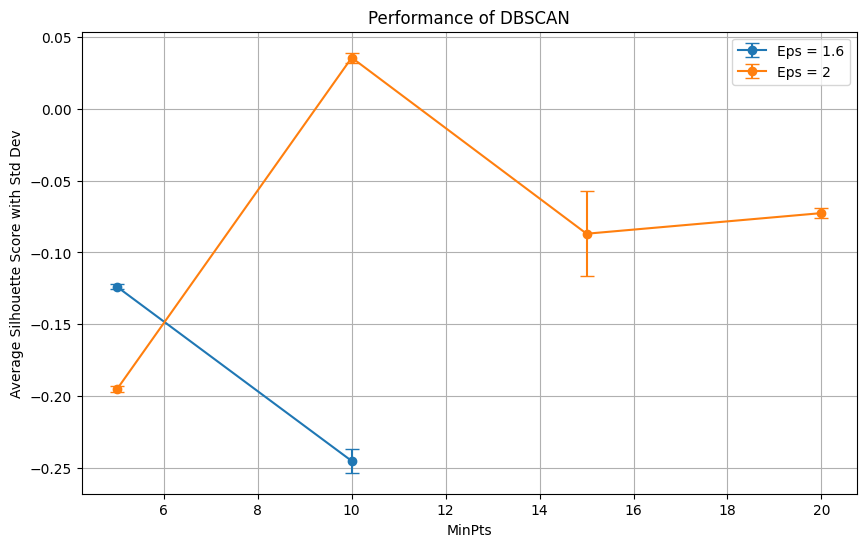

In [42]:
# Plotting results
plt.figure(figsize=(10, 6))
for eps, stats in results.items():
    means = [stats[min_samples]['mean'] for min_samples in min_samples_values]
    stds = [stats[min_samples]['std'] for min_samples in min_samples_values]
    plt.errorbar(min_samples_values, means, yerr=stds, label=f'Eps = {eps}', fmt='-o', capsize=5)

plt.title('Performance of DBSCAN')
plt.xlabel('MinPts')
plt.ylabel('Average Silhouette Score with Std Dev')
plt.legend()
plt.grid(True)
plt.show()

{1.6: {5: {'mean': -0.12524483784681703, 'std': 0.002994596820066126},
  10: {'mean': -0.2465572218083516, 'std': 0.00653617042779964},
  15: {'mean': nan, 'std': nan},
  20: {'mean': nan, 'std': nan}},
 2: {5: {'mean': -0.1965119014940488, 'std': 0.002358918889655815},
  10: {'mean': 0.03416964489512125, 'std': 0.0034411152270755543},
  15: {'mean': -0.10802560380808864, 'std': 0.020577858618509075},
  20: {'mean': -0.07725995899591272, 'std': 0.006739959184830651}}}

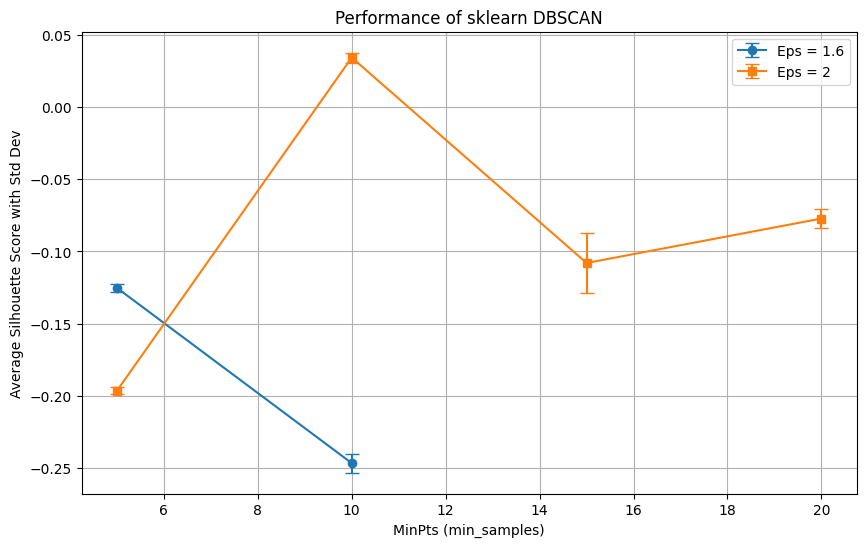

In [44]:
from sklearn.cluster import DBSCAN

# Parameters for DBSCAN
min_samples_values = [5, 10, 15, 20]
eps_values = [1.6, 2]
num_runs = 10

# Prepare results storage
results_sklearn = {}

X_norm = X / np.std(X,axis = 0)
X_norm -= np.mean(X, axis = 0)

for eps in eps_values:
    results_sklearn[eps] = {}
    for min_samples in min_samples_values:
        silhouette_scores = []
        for _ in range(num_runs):
            # Add small noise to simulate different runs
            perturbed_data = X_norm + np.random.normal(0, 0.01, X_norm.shape)
            # Instantiate and fit DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(perturbed_data)
            # Calculate Silhouette score if valid (more than one cluster, less than one noise)
            if len(set(labels)) > 1 and np.count_nonzero(labels != -1) > 1:
                score = silhouette_score(perturbed_data, labels)
                silhouette_scores.append(score)
        
        # Calculate and store the average and std deviation of scores
        results_sklearn[eps][min_samples] = {
            'mean': np.mean(silhouette_scores) if silhouette_scores else float('nan'),
            'std': np.std(silhouette_scores) if silhouette_scores else float('nan')
        }

display(results_sklearn)
# Plotting results_sklearn
plt.figure(figsize=(10, 6))
markers = ['o-', 's-']
i = 0
for eps, stats in results_sklearn.items():
    means = [stats[min_samples]['mean'] for min_samples in min_samples_values]
    stds = [stats[min_samples]['std'] for min_samples in min_samples_values]
    plt.errorbar(min_samples_values, means, yerr=stds, label=f'Eps = {eps}', fmt=markers[i], capsize=5)
    i += 1

plt.title('Performance of sklearn DBSCAN')
plt.xlabel('MinPts (min_samples)')
plt.ylabel('Average Silhouette Score with Std Dev')
plt.legend()
plt.grid(True)
plt.show()

# Graph-based clustering with Spectral Clustering

In [47]:
import numpy as np
from scipy.sparse import csgraph
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
class SpectralClustering:
    def __init__(self, n_clusters=2, gamma=1.0):
        self.n_clusters = n_clusters
        self.gamma = gamma  # Scale parameter for Gaussian similarity function

    def fit_predict(self, data):
        # Step 1: Construct the similarity matrix
        similarity_matrix = self._gaussian_similarity_matrix(data, self.gamma)

        # Step 2: Compute the Laplacian matrix
        laplacian = csgraph.laplacian(similarity_matrix, normed=False)

        # Step 3: Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(laplacian)

        # Step 4: Sort the eigenvectors by their corresponding eigenvalues
        # Smallest first
        idx = np.argsort(eigenvalues)
        eigenvectors = eigenvectors[:, idx]

        # Step 5: Select the first k eigenvectors to form a matrix U
        U = eigenvectors[:, :self.n_clusters]

        # Step 6: Cluster rows of U using K-means
        kmeans = KMeans(n_clusters=self.n_clusters, n_init="auto")
        labels = kmeans.fit_predict(U)
        return labels

    def _gaussian_similarity_matrix(self, data, gamma):
        # Calculate squared Euclidean distances
        pairwise_sq_dists = squareform(pdist(data, 'sqeuclidean'))
        # Apply Gaussian similarity function
        return np.exp(-gamma * pairwise_sq_dists)

In [48]:
# Parameters for spectral clustering
k_values = range(1, 6)
sigma_values = [0.1, 1, 10]
num_runs = 10

# Prepare results storage
results = {}

for sigma in sigma_values:
    gamma = 1.0 / (2 * sigma**2)
    results[sigma] = []
    for k in k_values:
        scores = []
        for _ in range(num_runs):
            # Add small noise to simulate different runs
            perturbed_data = X + np.random.normal(0, 0.01, X.shape)
            spectral = SpectralClustering(n_clusters=k, gamma=gamma)
            labels = spectral.fit_predict(perturbed_data)
            # Silhouette score is only valid if more than one cluster
            if len(set(labels)) > 1:
                score = silhouette_score(perturbed_data, labels)
                scores.append(score)
        
        # Calculate mean and standard deviation of silhouette scores
        mean_score = np.mean(scores) if scores else float('nan')
        std_score = np.std(scores) if scores else float('nan')
        results[sigma].append((mean_score, std_score))

results

{0.1: [(nan, nan),
  (-0.12064540680302213, 0.33540937187966563),
  (-0.541926838025418, 0.05072617179074035),
  (-0.6382540360567607, 0.04614576736894153),
  (-0.6968103276103342, 0.02836262880883935)],
 1: [(nan, nan),
  (-0.06655893716148029, 0.21084805359112577),
  (-0.34971465141682173, 0.19916183253549627),
  (-0.5645950050201116, 0.08556818851170968),
  (-0.5399150381769051, 0.18215426743355964)],
 10: [(nan, nan),
  (0.35004473379985873, 0.31975840279193446),
  (0.2024937297789063, 0.33179707237921524),
  (0.06943289064761796, 0.39433129004462275),
  (0.08908198723225877, 0.3310996052283428)]}

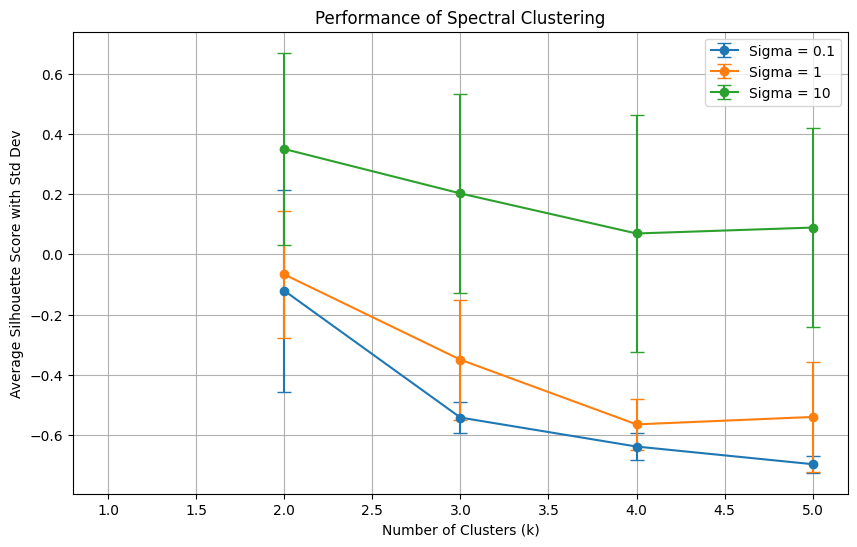

In [49]:
# Plotting the results
plt.figure(figsize=(10, 6))
for sigma, scores in results.items():
    means = [score[0] for score in scores]
    stds = [score[1] for score in scores]
    plt.errorbar(k_values, means, yerr=stds, label=f'Sigma = {sigma}', fmt='-o', capsize=5)

plt.title('Performance of Spectral Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score with Std Dev')
plt.legend()
plt.grid(True)
plt.show()

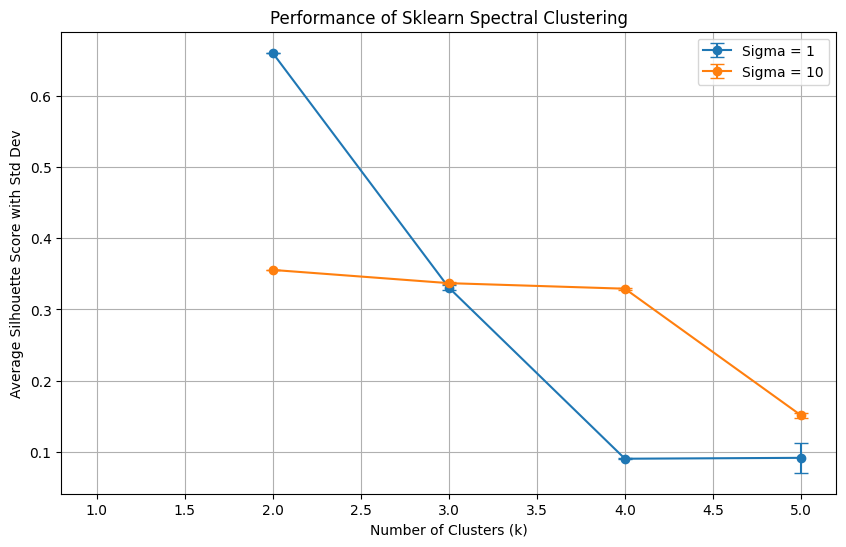

In [55]:
from sklearn.cluster import SpectralClustering
# Parameters for spectral clustering
k_values = range(1, 6)
sigma_values = [1, 10]
num_runs = 10

# Prepare results storage for sklearn implementation
sklearn_results = {}
X_norm = X / np.std(X,axis = 0)
X_norm -= np.mean(X, axis = 0)

for sigma in sigma_values:
    gamma = 1.0 / (2 * sigma**2)  # Convert sigma to gamma for the RBF kernel
    sklearn_results[sigma] = []
    for k in k_values:
        sklearn_scores = []
        for _ in range(num_runs):
            # Add small noise to simulate different runs
            perturbed_data = X_norm + np.random.normal(0, 0.01, X_norm.shape)
            # Sklearn spectral clustering
            sklearn_spectral = SpectralClustering(n_clusters=k, gamma=gamma, n_init=10, affinity='rbf')
            sklearn_labels = sklearn_spectral.fit_predict(perturbed_data)
            if len(set(sklearn_labels)) > 1:  # Check to ensure more than one cluster exists
                sklearn_score = silhouette_score(perturbed_data, sklearn_labels)
                sklearn_scores.append(sklearn_score)
        
        # Calculate mean and standard deviation of silhouette scores
        sklearn_mean_score = np.mean(sklearn_scores) if sklearn_scores else float('nan')
        sklearn_std_score = np.std(sklearn_scores) if sklearn_scores else float('nan')
        sklearn_results[sigma].append((sklearn_mean_score, sklearn_std_score))

# Plotting the results
plt.figure(figsize=(10, 6))
for sigma, scores in sklearn_results.items():
    means = [score[0] for score in scores]
    stds = [score[1] for score in scores]
    plt.errorbar(k_values, means, yerr=stds, label=f'Sigma = {sigma}', fmt='-o', capsize=5)

plt.title('Performance of Sklearn Spectral Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score with Std Dev')
plt.legend()
plt.grid(True)
plt.show()

# Anomaly detection with the Isolation Forest

In [32]:
class IsolationTree:
    def __init__(self, height_limit):
        self.height_limit = height_limit
        self.root = None

    class Node:
        def __init__(self, split_attr=None, split_val=None, left=None, right=None, size=0):
            self.split_attr = split_attr
            self.split_val = split_val
            self.left = left
            self.right = right
            self.size = size  # number of samples at node before split

    def fit(self, X):
        self.root = self._fit(X, 0)

    def _fit(self, X, current_height):
        num_samples, num_features = X.shape
        if num_samples <= 1 or current_height >= self.height_limit:
            return self.Node(size=num_samples)
        
        split_attr = np.random.randint(num_features)
        min_val, max_val = np.min(X[:, split_attr]), np.max(X[:, split_attr])
        
        if min_val == max_val:
            return self.Node(size=num_samples)

        split_val = np.random.uniform(min_val, max_val)
        left_mask = X[:, split_attr] < split_val
        right_mask = ~left_mask
        
        left_child = self._fit(X[left_mask], current_height + 1)
        right_child = self._fit(X[right_mask], current_height + 1)
        
        return self.Node(split_attr, split_val, left_child, right_child, num_samples)

    def path_length(self, X):
        return np.array([self._path_length(x, self.root, 0) for x in X])

    def _path_length(self, x, node, current_height):
        if node.left is None or node.right is None:
            # Estimation of path length in external nodes
            return current_height + self._c(node.size)
        
        if x[node.split_attr] < node.split_val:
            return self._path_length(x, node.left, current_height + 1)
        else:
            return self._path_length(x, node.right, current_height + 1)

    def _c(self, size):
        if size > 2:
            return 2 * (np.log(size - 1) + 0.5772156649) - 2 * (size - 1) / size
        elif size == 2:
            return 1
        else:
            return 0

class IsolationForest:
    def __init__(self, num_trees=100, subsampling_size=256):
        self.num_trees = num_trees
        self.subsampling_size = subsampling_size
        self.trees = []

    def fit(self, X):
        self.trees = []
        for _ in range(self.num_trees):
            if len(X) > self.subsampling_size:
                indices = np.random.choice(len(X), self.subsampling_size, replace=False)
                subset = X.iloc[indices]  # Use .iloc for DataFrame
            else:
                subset = X
            tree = IsolationTree(height_limit=np.ceil(np.log2(self.subsampling_size)))
            tree.fit(subset.to_numpy())  # Convert to numpy array before fitting
            self.trees.append(tree)

    def anomaly_score(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        path_lengths = np.array([tree.path_length(X) for tree in self.trees])
        mean_path_lengths = path_lengths.mean(axis=0)
        # Calculation of anomaly scores
        scores = 2 ** (-mean_path_lengths / self.trees[0]._c(self.subsampling_size))
        return scores

In [33]:
# Instantiate and fit Isolation Forest
isolation_forest = IsolationForest(num_trees=100, subsampling_size=256)
isolation_forest.fit(X)

# Get anomaly scores and determine thresholds for anomaly cut-offs
scores = isolation_forest.anomaly_score(X)
thresholds = np.percentile(scores, [99, 95, 90, 85])  # Corresponding to 1%, 5%, 10%, and 15% top anomalies
thresholds

array([0.62285211, 0.52947131, 0.4952908 , 0.47354775])

[0.0, 0.0, 1.1102230246251565e-16, 1.1102230246251565e-16]


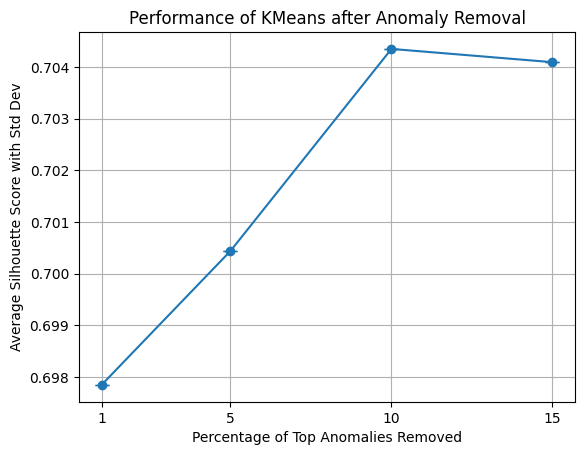

In [40]:
from sklearn.cluster import KMeans as SKLearnKMeans

# KMeans configuration
k = 2
initialization = 'k-means++'
num_runs = 10

results = {}  # Dictionary to store results

for pct, thresh in zip(percentages, thresholds):
    results[pct] = []  # Initialize a list for each percentage
    filtered_data = X[scores <= thresh]  # Filter data to remove top anomalies
    silhouette_scores = []
    for _ in range(10):  # Run KMeans 10 times
        kmeans = SKLearnKMeans(n_clusters=2, init=initialization, n_init=10)
        labels = kmeans.fit_predict(filtered_data)
        if len(set(labels)) > 1:
            score = silhouette_score(filtered_data, labels)
            silhouette_scores.append(score)
    
    # Calculate mean and standard deviation of silhouette scores
    mean_score = np.mean(silhouette_scores) if silhouette_scores else float('nan')
    std_score = np.std(silhouette_scores) if silhouette_scores else float('nan')
    results[pct].append((mean_score, std_score))

# Optionally, plot the results
means = [results[pct][0][0] for pct in percentages]
stds = [results[pct][0][1] for pct in percentages]

plt.errorbar(percentages, means, yerr=stds, fmt='-o', capsize=5)
plt.title('Performance of KMeans after Anomaly Removal')
plt.xlabel('Percentage of Top Anomalies Removed')
plt.ylabel('Average Silhouette Score with Std Dev')
plt.xticks(percentages)
plt.grid(True)
plt.show()

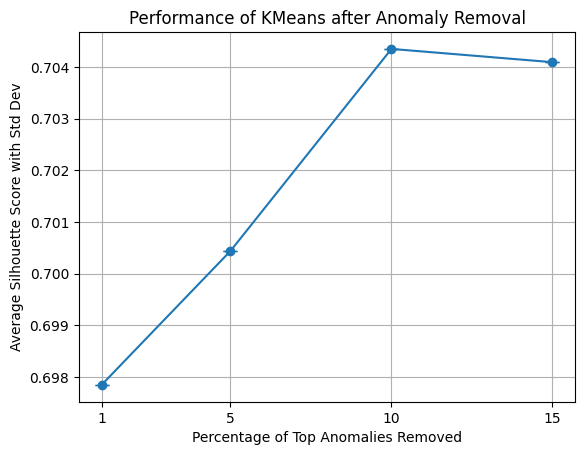

In [38]:
from sklearn.cluster import KMeans as SKLearnKMeans
from sklearn.ensemble import IsolationForest as SKLearnIsolationForest


# Instantiate and fit Isolation Forest
iso_forest = SKLearnIsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(X)
scores = iso_forest.decision_function(X)
scores = -scores  # Higher scores indicate more abnormal

# Define thresholds for the top 1%, 5%, 10%, and 15% anomalies
percentages = [1, 5, 10, 15]
thresholds = np.percentile(scores, [100 - pct for pct in percentages])

# KMeans configuration
k = 2
initialization = 'k-means++'
num_runs = 10

# Dictionary to store results
results = {}

# Evaluate KMeans after removing top anomalies
for pct, thresh in zip(percentages, thresholds):
    results[pct] = []
    # Filter data to remove top anomalies
    filtered_data = X[scores <= thresh]
    
    silhouette_scores = []
    for _ in range(num_runs):
        kmeans = SKLearnKMeans(n_clusters=k, init=initialization, n_init=10, random_state=42)
        labels = kmeans.fit_predict(filtered_data)
        if len(set(labels)) > 1:
            score = silhouette_score(filtered_data, labels)
            silhouette_scores.append(score)
    
    # Calculate mean and standard deviation of silhouette scores
    mean_score = np.mean(silhouette_scores) if silhouette_scores else float('nan')
    std_score = np.std(silhouette_scores) if silhouette_scores else float('nan')
    results[pct].append((mean_score, std_score))

# Plotting the results
means = [results[pct][0][0] for pct in percentages]
stds = [results[pct][0][1] for pct in percentages]

plt.errorbar(percentages, means, yerr=stds, fmt='-o', capsize=5)
plt.title('Performance of KMeans after Anomaly Removal')
plt.xlabel('Percentage of Top Anomalies Removed')
plt.ylabel('Average Silhouette Score with Std Dev')
plt.xticks(percentages)
plt.grid(True)
plt.show()